<a href="https://colab.research.google.com/github/krystoliz/TemanPuan/blob/main/SentimenAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install re
!pip install seaborn
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/patriarkicomp.xlsx")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1791237423747539968,Sat May 18 10:37:54 +0000 2024,0,@lisanrhlz1 @MissJoane09 @convomfs Kalau untuk...,1.791780e+18,NaN,lisanrhlz1,in,NaN,0.0,0.0,0.0,https://x.com/AkunBkom/status/1791780243101135078,1.457899e+18,AkunBkom
1,1791746031195229952,Sat May 18 08:23:04 +0000 2024,0,@kochengfs kalo kb kucing itu pake obat pil ka...,1.791746e+18,NaN,kochengfs,in,random of mulfand,0.0,2.0,0.0,https://x.com/mengsilentsiren/status/179174631...,1.007033e+18,mengsilentsiren
2,1791731087330409984,Sat May 18 07:22:34 +0000 2024,0,Cara minum pil KB Andalan harus dilakukan sesu...,1.791731e+18,NaN,NaN,in,NaN,0.0,0.0,0.0,https://x.com/kumparanMOM/status/1791731087330...,9.290468e+17,kumparanMOM
3,1791636478344489984,Sat May 18 01:16:16 +0000 2024,0,@txtyana57 @tanyarlfes Aku itu kemaren kb pil ...,1.791639e+18,NaN,txtyana57,in,NaN,0.0,1.0,0.0,https://x.com/ItsHeeJin/status/179163890604542...,1.348691e+09,ItsHeeJin
4,1790780409305050112,Fri May 17 14:50:17 +0000 2024,0,@DrEvaChaniago Saya pernah kuliah Farmasi sebu...,1.791481e+18,NaN,DrEvaChaniago,in,"Setia Budi, Indonesia",0.0,0.0,0.0,https://x.com/baitulhikmahnu1/status/179148136...,1.294276e+18,baitulhikmahnu1


In [ ]:
df = df[['full_text','username']]
df


,full_text,username
0,@lisanrhlz1 @MissJoane09 @convomfs Kalau untuk...,AkunBkom
1,@kochengfs kalo kb kucing itu pake obat pil ka...,mengsilentsiren
2,Cara minum pil KB Andalan harus dilakukan sesu...,kumparanMOM
3,@txtyana57 @tanyarlfes Aku itu kemaren kb pil ...,ItsHeeJin
4,@DrEvaChaniago Saya pernah kuliah Farmasi sebu...,baitulhikmahnu1
...,...,...
2536,Ke surga ayo ke neraka terbawa serta. Istri ha...,NaN
2537,@15asr_ @tanyarlfes Ya itu emg kewajiban suami...,lintan997
2538,@tanyakanrl lahhh?!?! emang neneknya yang ngel...,unknowjn
2539,@tanyakanrl OMOO?!!! Suami Aneh Nder!! I Mean....,JGurlsz





# 1. Cleaning Data



In [ ]:
df.shape

(2541, 2)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.shape

(2,)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.isnull().sum()

In [ ]:
df.shape

(2,)

In [ ]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [ ]:
df.shape

(2538, 3)

In [ ]:
df

,full_text,username
0,@lisanrhlz1 @MissJoane09 @convomfs Kalau untuk...,AkunBkom
1,@kochengfs kalo kb kucing itu pake obat pil ka...,mengsilentsiren
2,Cara minum pil KB Andalan harus dilakukan sesu...,kumparanMOM
3,@txtyana57 @tanyarlfes Aku itu kemaren kb pil ...,ItsHeeJin
4,@DrEvaChaniago Saya pernah kuliah Farmasi sebu...,baitulhikmahnu1
...,...,...
2536,Ke surga ayo ke neraka terbawa serta. Istri ha...,NaN
2537,@15asr_ @tanyarlfes Ya itu emg kewajiban suami...,lintan997
2538,@tanyakanrl lahhh?!?! emang neneknya yang ngel...,unknowjn
2539,@tanyakanrl OMOO?!!! Suami Aneh Nder!! I Mean....,JGurlsz


In [ ]:
def clean_twitter_tweets(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #delete mention
  text = re.sub(r'#\w+', '', text) #delete hashtag
  text = re.sub(r'RT[\s]+', '', text) #delete retweet
  text = re.sub(r'https?://\S+', '', text) #delete link
  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #delete non alphanumerics
  text = re.sub(r'\s+', ' ', text).strip() #delete redundant whitespace
  return text

df['full_text'] = df['full_text'].apply(clean_twitter_tweets)

TypeError: expected string or bytes-like object

In [ ]:
df['full_text'] = df['full_text'].str.lower()


In [ ]:
df

,Unnamed: 0,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_translated,compound_score,sentiment
0,0,1791369757427687936,Fri May 17 07:26:46 +0000 2024,17,saya tdk akan mengijinkan istri saya menggunak...,1791369757427687936,NaN,NaN,in,NaN,1,2,4,https://x.com/AndrewsTjan/status/1791369757427...,1176673445263766016,AndrewsTjan,allow the wife to use birth control pills even...,0.7269,Positif
1,1,1791326801974972928,Fri May 17 04:36:05 +0000 2024,0,pgn ke dokter tp takut disaranin minum pil kb ...,1791326801974972928,NaN,NaN,in,NaN,0,1,0,https://x.com/putyoufirst__/status/17913268019...,1420001936,putyoufirst__,I'm afraid the doctor will advise me to take b...,0.0314,Positif
2,2,1791093958623588096,Fri May 17 01:37:15 +0000 2024,0,generasi pil kb suntik kb,1791281796077981952,NaN,belanjaholics,in,NaN,0,0,0,https://x.com/linwang00089174/status/179128179...,1283812470226693888,linwang00089174,"generation of birth control pills, birth contr...",0.0000,Netral
3,3,1791275203177426944,Fri May 17 01:11:03 +0000 2024,0,si tolol mengira bahwa hanya pasangan yang bel...,1791275203177426944,NaN,NaN,in,NaN,0,0,0,https://x.com/ketekreze/status/179127520317742...,1073425597362188032,ketekreze,The fool thinks that married couples have sex ...,-0.4956,Negatif
4,4,1791265253390689024,Fri May 17 00:31:31 +0000 2024,0,mencegah biar ga hamilnambah anak gblk bukan c...,1791265253390689024,NaN,NaN,in,NaN,0,0,0,https://x.com/anothermaria4/status/17912652533...,1592151788660346880,anothermaria4,Preventing pregnancy so that you don't get mor...,0.0772,Positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,13705,1766659521148056064,Mon Mar 11 02:12:32 +0000 2024,0,kapan si dia nunjukin dia patriarki wkwk,1767010690265654016,NaN,dalyeonin,in,NaN,0,0,0,https://x.com/risserius/status/176701069026565...,1359141631031614976,risserius,NaN,NaN,NaN
13706,13706,1767010254204915968,Mon Mar 11 02:10:48 +0000 2024,0,alhamdulillah udah dr sma dpt temen cowok yg g...,1767010254204915968,NaN,NaN,in,enchanting,0,1,0,https://x.com/isvereux/status/1767010254204916147,1321364207569228032,isvereux,NaN,NaN,NaN
13707,13707,1767009401418998016,Mon Mar 11 02:07:25 +0000 2024,0,emang sjw feminis ekstrem makin hari makin ga ...,1767009401418998016,NaN,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/sintya____/status/17670094014189...,1035446467832372992,sintya____,NaN,NaN,NaN
13708,13708,1767009192416882944,Mon Mar 11 02:06:35 +0000 2024,0,big no gw emang mau tetep berkarir walaupun ud...,1767009192416882944,NaN,NaN,in,☾𖤓,0,1,0,https://x.com/triviaswz/status/176700919241688...,1538510468465443072,triviaswz,NaN,NaN,NaN


# 2. Preprocessing

In [ ]:
# 1 Normalisasi
norm = {" yg ":" yang "," ngga ":" tidak "," tdk ":" tidak ", " jg ": " juga ", " mo ":" mau "," tp ":" tapi "," gue ":" saya "," gua ":" saya "," gw ":" saya ", " gk ":" tidak "}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x:normalisasi(x))
df

,Unnamed: 0,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_translated,compound_score,sentiment
0,0,1791369757427687936,Fri May 17 07:26:46 +0000 2024,17,saya tidak akan mengijinkan istri saya menggun...,1791369757427687936,NaN,NaN,in,NaN,1,2,4,https://x.com/AndrewsTjan/status/1791369757427...,1176673445263766016,AndrewsTjan,allow the wife to use birth control pills even...,0.7269,Positif
1,1,1791326801974972928,Fri May 17 04:36:05 +0000 2024,0,pgn ke dokter tapi takut disaranin minum pil k...,1791326801974972928,NaN,NaN,in,NaN,0,1,0,https://x.com/putyoufirst__/status/17913268019...,1420001936,putyoufirst__,I'm afraid the doctor will advise me to take b...,0.0314,Positif
2,2,1791093958623588096,Fri May 17 01:37:15 +0000 2024,0,generasi pil kb suntik kb,1791281796077981952,NaN,belanjaholics,in,NaN,0,0,0,https://x.com/linwang00089174/status/179128179...,1283812470226693888,linwang00089174,"generation of birth control pills, birth contr...",0.0000,Netral
3,3,1791275203177426944,Fri May 17 01:11:03 +0000 2024,0,si tolol mengira bahwa hanya pasangan yang bel...,1791275203177426944,NaN,NaN,in,NaN,0,0,0,https://x.com/ketekreze/status/179127520317742...,1073425597362188032,ketekreze,The fool thinks that married couples have sex ...,-0.4956,Negatif
4,4,1791265253390689024,Fri May 17 00:31:31 +0000 2024,0,mencegah biar ga hamilnambah anak gblk bukan c...,1791265253390689024,NaN,NaN,in,NaN,0,0,0,https://x.com/anothermaria4/status/17912652533...,1592151788660346880,anothermaria4,Preventing pregnancy so that you don't get mor...,0.0772,Positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,13705,1766659521148056064,Mon Mar 11 02:12:32 +0000 2024,0,kapan si dia nunjukin dia patriarki wkwk,1767010690265654016,NaN,dalyeonin,in,NaN,0,0,0,https://x.com/risserius/status/176701069026565...,1359141631031614976,risserius,NaN,NaN,NaN
13706,13706,1767010254204915968,Mon Mar 11 02:10:48 +0000 2024,0,alhamdulillah udah dr sma dpt temen cowok yang...,1767010254204915968,NaN,NaN,in,enchanting,0,1,0,https://x.com/isvereux/status/1767010254204916147,1321364207569228032,isvereux,NaN,NaN,NaN
13707,13707,1767009401418998016,Mon Mar 11 02:07:25 +0000 2024,0,emang sjw feminis ekstrem makin hari makin ga ...,1767009401418998016,NaN,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/sintya____/status/17670094014189...,1035446467832372992,sintya____,NaN,NaN,NaN
13708,13708,1767009192416882944,Mon Mar 11 02:06:35 +0000 2024,0,big no saya emang mau tetep berkarir walaupun ...,1767009192416882944,NaN,NaN,in,☾𖤓,0,1,0,https://x.com/triviaswz/status/176700919241688...,1538510468465443072,triviaswz,NaN,NaN,NaN


In [ ]:
df.to_excel("VaderSentimenLengkapPreprocessed.xlsx")

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
# 2 Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


stop_words = StopWordRemoverFactory().get_stop_words()


new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)


def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text']=df["full_text"].apply(lambda x:stopword(x))
df.head()

,full_text,username,created_at
0,mengijinkan istri menggunakan pil kb walaupun ...,AndrewsTjan,Fri May 17 07:26:46 +0000 2024
1,pgn dokter takut disaranin minum pil kb lg mak...,putyoufirst__,Fri May 17 04:36:05 +0000 2024
2,generasi pil kb suntik kb,linwang00089174,Fri May 17 01:37:15 +0000 2024
3,si tolol mengira pasangan menikah seks menggun...,ketekreze,Fri May 17 01:11:03 +0000 2024
4,mencegah biar ga hamilnambah anak gblk bukan c...,anothermaria4,Fri May 17 00:31:31 +0000 2024


TRANSLATE DULU

In [ ]:
# 3 Tokenize
tokenized_eng = df['full_text_translated'].apply(lambda x:x.split())
tokenized_id = df['full_text'].apply(lambda x:x.split())

In [ ]:
tokenized_eng

0        [allow, the, wife, to, use, birth, control, pi...
1        [I'm, afraid, the, doctor, will, advise, me, t...
2        [generation, of, birth, control, pills,, birth...
3        [The, fool, thinks, that, married, couples, ha...
4        [Preventing, pregnancy, so, that, you, don't, ...
                               ...                        
13687           [when, will, he, show, patriarchy, hahaha]
13688    [Thank, God,, I've, had, a, boyfriend, since, ...
13689    [It's, true, that, extreme, feminists, are, in...
13690    [big, no,, I, really, want, to, continue, my, ...
13691    [A, movement, against, patriarchy, is, being, ...
Name: full_text_translated, Length: 13692, dtype: object

In [ ]:
# 4 Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized_eng.apply(stemming)

tokenized.to_csv("/content/iisma1_preprocessed.csv", index=False)
data = pd.read_csv("/content/iisma1_preprocessed.csv", encoding='latin1')

allow the wife to use birth control pills even if it is on the doctor s recommendation for a second opinion you need to consult a doctor if you know a doctor ask the doctor recommend that you be smart in choosing to use it
i m afraid the doctor will advise me to take birth control pills again my periods are getting more and more frequent no menstruation 2 mg litereli 14 days then it s clean day 11 the last day it feels like the first day aka i m having a stomach ache in my back again akhhhh
generation of birth control pills birth control injections
the fool thinks that married couples have sex using condoms in cases of unplanned pregnancies husbands have crotches inside wives are not ready to have children btw if you think that taking birth control pills is enough for prevention that s fine
preventing pregnancy so that you don t get more pregnant children isn t just a disease learn about the types of birth control don t just know about birth control pills it s difficult for the governm

KeyboardInterrupt: 

# 3. Translate

cara baru

In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=9756f67497aedc07543d997283e1295dd58fbfb7249dc6a8ece9d56299ed8786
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
import googletrans
from googletrans import Translator
from googletrans import LANGUAGES
import pandas as pd
import numpy as np

In [ ]:
translator = Translator()

In [ ]:
df.columns = ['full_text','username','created_at']

In [ ]:
print(df)

                                               full_text         username  \
0      mengijinkan istri menggunakan pil kb walaupun ...      AndrewsTjan   
1      pgn dokter takut disaranin minum pil kb lg mak...    putyoufirst__   
2                              generasi pil kb suntik kb  linwang00089174   
3      si tolol mengira pasangan menikah seks menggun...        ketekreze   
4      mencegah biar ga hamilnambah anak gblk bukan c...    anothermaria4   
...                                                  ...              ...   
13705                   kapan si nunjukin patriarki wkwk        risserius   
13706  alhamdulillah udah dr sma dpt temen cowok gak ...         isvereux   
13707  emang sjw feminis ekstrem makin hari makin ga ...       sintya____   
13708  big no emang mau tetep berkarir walaupun udh n...        triviaswz   
13709  kan digaungkan gerakan melawan patriarki kalo ...       ayamungkap   

                           created_at  
0      Fri May 17 07:26:46 +0000 20

In [ ]:
translated_words = []
src_lang_key = []
full_source_language = []

In [ ]:
df

,full_text,username,created_at
0,mengijinkan istri menggunakan pil kb walaupun ...,AndrewsTjan,Fri May 17 07:26:46 +0000 2024
1,pgn dokter takut disaranin minum pil kb lg mak...,putyoufirst__,Fri May 17 04:36:05 +0000 2024
2,generasi pil kb suntik kb,linwang00089174,Fri May 17 01:37:15 +0000 2024
3,si tolol mengira pasangan menikah seks menggun...,ketekreze,Fri May 17 01:11:03 +0000 2024
4,mencegah biar ga hamilnambah anak gblk bukan c...,anothermaria4,Fri May 17 00:31:31 +0000 2024
...,...,...,...
13705,kapan si nunjukin patriarki wkwk,risserius,Mon Mar 11 02:12:32 +0000 2024
13706,alhamdulillah udah dr sma dpt temen cowok gak ...,isvereux,Mon Mar 11 02:10:48 +0000 2024
13707,emang sjw feminis ekstrem makin hari makin ga ...,sintya____,Mon Mar 11 02:07:25 +0000 2024
13708,big no emang mau tetep berkarir walaupun udh n...,triviaswz,Mon Mar 11 02:06:35 +0000 2024


In [ ]:
df.to_csv("/content/patriarki_prepro.csv")

In [ ]:
for element in df['full_text']:
  translated_words.append(translator.translate(element).text)
  src_lang_key.append(translator.translate(element).src)
  full_source_language.append(LANGUAGES[translator.translate(element).src])

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
print(translated_words)

CARA ORI

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv("/content/iisma1_preprocessed.csv")
data.head()

,full_text
0,kalo eligble ikut iisma 23 gpp moga makin mate...
1,info iisma buat anak itb
2,didik karier bukan kompetisi but sbmptn mbkm i...
3,mau daftar iisma gaa dinn
4,tibatiba tarik iisma


In [ ]:
from translate import Translator

def convert_eng(tweet):
  translator = Translator(to_lang="en", from_lang='id')
  translation = translator.translate(tweet)
  return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)

data.to_csv("/content/iisma1_preprocessed_translated.csv")

In [ ]:
data

,full_text,tweet_english
0,kalo eligble ikut iisma 23 gpp moga makin mate...,if you are eligible to participate in iisma 23...
1,info iisma buat anak itb,iisma info for the child itb
2,didik karier bukan kompetisi but sbmptn mbkm i...,career education is not a boot competition sbm...
3,mau daftar iisma gaa dinn,want to register iisma gaa dinn
4,tibatiba tarik iisma,sudden pull of the iism
...,...,...
447,yaallah asa baru kemaren gagal iisma udh sosia...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
448,tdk iisma dlu,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
449,guweh beneran pen nang deh klo fitur mute semu...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
450,sosialisasi program iisma sarjana vokasi 2023,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


# 4. Labelling

In [ ]:
data = pd.read_csv("/content/iisma1_preprocessed_translated.csv")
data

,Unnamed: 0,full_text,tweet_english
0,0,kalo eligble ikut iisma 23 gpp moga makin mate...,if you are eligible to participate in iisma 23...
1,1,info iisma buat anak itb,iisma info for the child itb
2,2,didik karier bukan kompetisi but sbmptn mbkm i...,career education is not a boot competition sbm...
3,3,mau daftar iisma gaa dinn,want to register iisma gaa dinn
4,4,tibatiba tarik iisma,sudden pull of the iism
...,...,...,...
447,447,yaallah asa baru kemaren gagal iisma udh sosia...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
448,448,tdk iisma dlu,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
449,449,guweh beneran pen nang deh klo fitur mute semu...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
450,450,sosialisasi program iisma sarjana vokasi 2023,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')



Hasil Analisis Data:
Positif = 32
Netral = 59
Negatif = 9

Total Data : 100


In [ ]:
data['klasifikasi'] = status


ValueError: Length of values (452) does not match length of index (100)

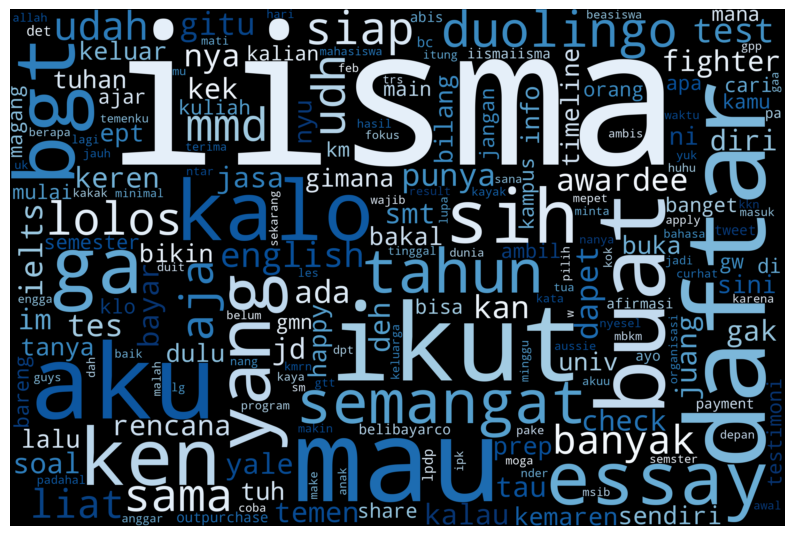

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

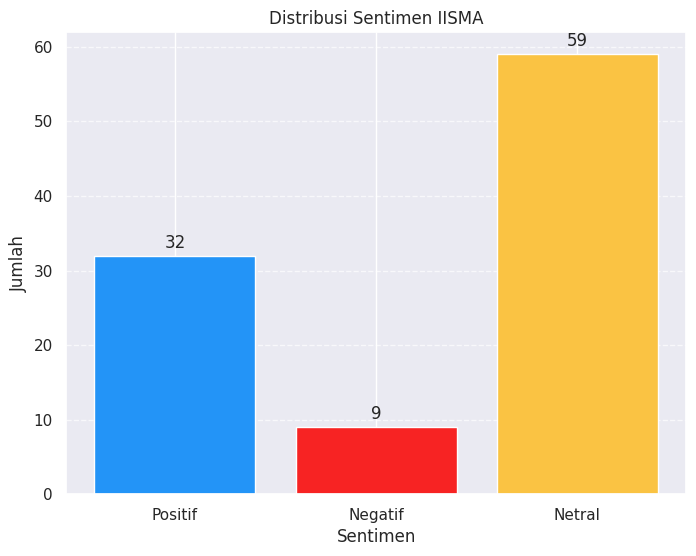

In [ ]:
#visualisasijumlahsentimen
import seaborn as sns

sns.set_theme()

labels = ['Positif','Negatif','Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#2394f7','#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height=bar.get_height()
    ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen IISMA")

#6. Klasifikasi Sentimen

In [ ]:
data


,Unnamed: 0,full_text,tweet_english,klasifikasi
0,0,kalo eligble ikut iisma 23 gpp moga makin mate...,if you are eligible to participate in iisma 23...,Positif
1,1,info iisma buat anak itb,iisma info for the child itb,Netral
2,2,didik karier bukan kompetisi but sbmptn mbkm i...,career education is not a boot competition sbm...,Netral
3,3,mau daftar iisma gaa dinn,want to register iisma gaa dinn,Netral
4,4,tibatiba tarik iisma,sudden pull of the iism,Netral
...,...,...,...,...
95,95,sbnrnya sih dalem hati degdegan tengah mati ha...,sbnrnya sih dalem hati degdegan tengah matiada...,Netral
96,96,check ignya iisma kak kmren udah share,check ignya iisma kak kmren already share,Netral
97,97,liat instagramnya iisma coba kmren udah share ...,look at his instagram iisma cuba kmren already...,Netral
98,98,sorry oot ada punya contoh essay ikut seleksi ...,sorry oot there are examples of essays partici...,Negatif


In [ ]:
dataset = data.drop(['Unnamed: 0'], axis=1, inplace=False)
dataset = dataset.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]


In [ ]:
dataset

[("if you are eligible to participate in iisma 23 GPP, let's hope that you will be more determined to make iisma 24 spirit",
  'Positif'),
 ('iisma info for the child itb', 'Netral'),
 ('career education is not a boot competition sbmptn mbkm iisma', 'Netral'),
 ('want to register iisma gaa dinn', 'Netral'),
 ('sudden pull of the iism', 'Netral'),
 ('there is mutual me ngeambis iisma', 'Netral'),
 ('this is how ak ambis focus iisma how', 'Netral'),
 ('suer pingin temen lalalal lilil want to join iisma next year', 'Netral'),
 ('enter ui pass iisma wkwkw', 'Netral'),
 ("guyss i think the week's health session i will vent deh hahahaha listen to vent me ya nti about postiisma blues",
  'Positif'),
 ('who want to register iisma ga', 'Netral'),
 ('iisma fighter who wants ready info ept', 'Positif'),
 ('ka ayya iisma gasih', 'Netral'),
 ('i forgot yesterday I got the Iisma file last year rich spillan ask like that',
  'Positif'),
 ('iisma udh open', 'Netral'),
 ("doi says i'm her role model ev

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1]=='Positif'):
    set_positif.append(n)
  elif(n[1]=='Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif= random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif+set_negatif+set_netral

train_set = []

for n in train:
  train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.834070796460177


In [ ]:
train_set = train_set[:100]
dataset = dataset[:100]


In [ ]:
dataset

[(0,
  "if you are eligible to participate in iisma 23 GPP, let's hope that you will be more determined to make iisma 24 spirit",
  'Positif'),
 (1, 'iisma info for the child itb', 'Netral'),
 (2, 'career education is not a boot competition sbmptn mbkm iisma', 'Netral'),
 (3, 'want to register iisma gaa dinn', 'Netral'),
 (4, 'sudden pull of the iism', 'Netral'),
 (5, 'there is mutual me ngeambis iisma', 'Netral'),
 (6, 'this is how ak ambis focus iisma how', 'Netral'),
 (7, 'suer pingin temen lalalal lilil want to join iisma next year', 'Netral'),
 (8, 'enter ui pass iisma wkwkw', 'Netral'),
 (9,
  "guyss i think the week's health session i will vent deh hahahaha listen to vent me ya nti about postiisma blues",
  'Positif'),
 (10, 'who want to register iisma ga', 'Netral'),
 (11, 'iisma fighter who wants ready info ept', 'Positif'),
 (12, 'ka ayya iisma gasih', 'Netral'),
 (13,
  'i forgot yesterday I got the Iisma file last year rich spillan ask like that',
  'Positif'),
 (14, 'iisma

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

ValueError: too many values to unpack (expected 2)

In [ ]:
# Labelling

data_tweet = list(data['tweet_english'])
polaritas=0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify()=='Positif':
    total_positif+=1
  elif analysis.classify()=='Netral':
    total_netral+=1
  else:
    total_negatif+=1

  status.append(analysis.classify())
  total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 277
Netral = 171
Negatif=4

Total Data : 452


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes":status})
data['klasifikasi_bayes']=status

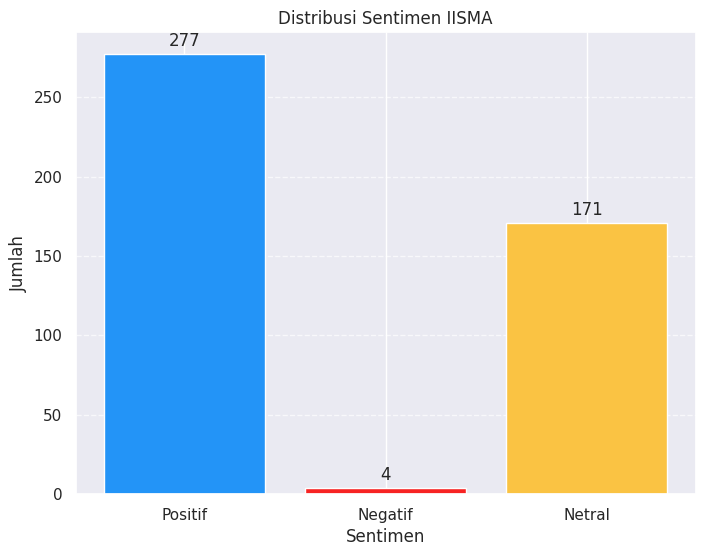

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif','Negatif','Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#2394f7','#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height=bar.get_height()
    ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen IISMA")

In [ ]:
data

,Unnamed: 0,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,0,kalo eligble ikut iisma 23 gpp moga makin mate...,if you are eligible to participate in iisma 23...,Positif,Netral
1,1,info iisma buat anak itb,iisma info for the child itb,Netral,Netral
2,2,didik karier bukan kompetisi but sbmptn mbkm i...,career education is not a boot competition sbm...,Netral,Netral
3,3,mau daftar iisma gaa dinn,want to register iisma gaa dinn,Netral,Netral
4,4,tibatiba tarik iisma,sudden pull of the iism,Netral,Netral
...,...,...,...,...,...
447,447,yaallah asa baru kemaren gagal iisma udh sosia...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
448,448,tdk iisma dlu,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
449,449,guweh beneran pen nang deh klo fitur mute semu...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
450,450,sosialisasi program iisma sarjana vokasi 2023,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [ ]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,kalo eligble ikut iisma 23 gpp moga makin mate...,if you are eligible to participate in iisma 23...,Positif,Netral
1,info iisma buat anak itb,iisma info for the child itb,Netral,Netral
2,didik karier bukan kompetisi but sbmptn mbkm i...,career education is not a boot competition sbm...,Netral,Netral
3,mau daftar iisma gaa dinn,want to register iisma gaa dinn,Netral,Netral
4,tibatiba tarik iisma,sudden pull of the iism,Netral,Netral
...,...,...,...,...
447,yaallah asa baru kemaren gagal iisma udh sosia...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
448,tdk iisma dlu,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
449,guweh beneran pen nang deh klo fitur mute semu...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
450,sosialisasi program iisma sarjana vokasi 2023,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [ ]:

data_eval=[tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
  if len(n) >= 4:
    if n[2]!=n[3]:
      print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
  else:
      print("Tuple tidak memiliki cukup elemen")

Text: kalo eligble ikut iisma 23 gpp moga makin mateng buat iisma 24 semangat
Classifier: Positif
Classifier Bayes: Netral

Text: guyss aku pikir sesi curhatan minggu aku bakal curhat deh hahahaha dengerin curhat aku ya nti ttg postiisma blues
Classifier: Positif
Classifier Bayes: Netral

Text: iisma fighter yang mau info siap ept
Classifier: Positif
Classifier Bayes: Netral

Text: gue lupa kemaren dapet file iisma tahun lalu kaya spillan tanya gitu gitu
Classifier: Positif
Classifier Bayes: Netral

Text: doi bilang aku role model nya padahal sendiri jauh lebih keren dapet iisma taiwan
Classifier: Positif
Classifier Bayes: Netral

Text: paid intern rencana bayar sini bakal kupake buat siap iisma walaupun aku belum yakin mau daftar engga nama rencana realisasi engga
Classifier: Negatif
Classifier Bayes: Netral

Text: happy chance nyale sm nyu sm cornell gabisa hehehe im so happy im so ready for iisma
Classifier: Positif
Classifier Bayes: Netral

Text: univ mau apply iisma
Classifier: Po